# Churn analysis -> Memberikan rekomendasi dan strategi untuk menurunkan churn dari pelanggan kita

## Data Preparation 

In [108]:
import pandas as pd
from IPython.display import display

df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/data_retail.csv", sep=";")
# df.to_csv(r"D:\Usep Syaikal Arifin\Computer Programming\Application File\Application File PT Bukit Makmur Mandiri Utama (BUMA)\Kelas Penerapan di Industri\Data Analyst Project - Business Decision Research\File Dokumentasi\File CSV\data_retail.csv", index=None, header=True)
# df.to_excel(r"D:\Usep Syaikal Arifin\Computer Programming\Application File\Application File PT Bukit Makmur Mandiri Utama (BUMA)\Kelas Penerapan di Industri\Data Analyst Project - Business Decision Research\File Dokumentasi\File Excel\data_retail.xlsx", index=None, header=True)
display(df.info())
display(df.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   no                          100000 non-null  int64 
 1   Row_Num                     100000 non-null  int64 
 2   Customer_ID                 100000 non-null  int64 
 3   Product                     100000 non-null  object
 4   First_Transaction           100000 non-null  int64 
 5   Last_Transaction            100000 non-null  int64 
 6   Average_Transaction_Amount  100000 non-null  int64 
 7   Count_Transaction           100000 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 6.1+ MB


None

,no,Row_Num,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction
0,1,1,29531,Jaket,1466304274396,1538718482608,1467681,22
1,2,2,29531,Sepatu,1406077331494,1545735761270,1269337,41
2,3,3,141526,Tas,1493349147000,1548322802000,310915,30
3,4,4,141526,Jaket,1493362372547,1547643603911,722632,27
4,5,5,37545,Sepatu,1429178498531,1542891221530,1775036,25
5,6,6,37545,Tas,1519219258000,1542989347000,298375,22
6,7,7,65342,Sepatu,1454659134434,1542968202657,2128787,71
7,8,8,40717,Sepatu,1426154391562,1535076416985,894521,21
8,9,9,39435,Sepatu,1423737360638,1540998849398,2204904,124
9,10,10,25636,Sepatu,1405249008682,1545288777860,1213485,89


In [109]:
df["First_Transaction"] = pd.to_datetime(df["First_Transaction"], unit="ms")
df["Last_Transaction"] = pd.to_datetime(df["Last_Transaction"], unit="ms")

display(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   no                          100000 non-null  int64         
 1   Row_Num                     100000 non-null  int64         
 2   Customer_ID                 100000 non-null  int64         
 3   Product                     100000 non-null  object        
 4   First_Transaction           100000 non-null  datetime64[ns]
 5   Last_Transaction            100000 non-null  datetime64[ns]
 6   Average_Transaction_Amount  100000 non-null  int64         
 7   Count_Transaction           100000 non-null  int64         
dtypes: datetime64[ns](2), int64(5), object(1)
memory usage: 6.1+ MB


None

,no,Row_Num,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction
0,1,1,29531,Jaket,2016-06-19 02:44:34.396,2018-10-05 05:48:02.608,1467681,22
1,2,2,29531,Sepatu,2014-07-23 01:02:11.494,2018-12-25 11:02:41.270,1269337,41
2,3,3,141526,Tas,2017-04-28 03:12:27.000,2019-01-24 09:40:02.000,310915,30
3,4,4,141526,Jaket,2017-04-28 06:52:52.547,2019-01-16 13:00:03.911,722632,27
4,5,5,37545,Sepatu,2015-04-16 10:01:38.531,2018-11-22 12:53:41.530,1775036,25


## Membuat Kolom Churn Customers

In [110]:
print(max(df["Last_Transaction"]))
max_churn_category = "2018-08-01"

df.loc[df["Last_Transaction"] <= max_churn_category, "is_churn"] = True
df.loc[df["Last_Transaction"] > max_churn_category, "is_churn"] = False

display(df.info())
display(df.head())

2019-02-01 23:57:57.286000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   no                          100000 non-null  int64         
 1   Row_Num                     100000 non-null  int64         
 2   Customer_ID                 100000 non-null  int64         
 3   Product                     100000 non-null  object        
 4   First_Transaction           100000 non-null  datetime64[ns]
 5   Last_Transaction            100000 non-null  datetime64[ns]
 6   Average_Transaction_Amount  100000 non-null  int64         
 7   Count_Transaction           100000 non-null  int64         
 8   is_churn                    100000 non-null  object        
dtypes: datetime64[ns](2), int64(5), object(2)
memory usage: 6.9+ MB


None

,no,Row_Num,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction,is_churn
0,1,1,29531,Jaket,2016-06-19 02:44:34.396,2018-10-05 05:48:02.608,1467681,22,False
1,2,2,29531,Sepatu,2014-07-23 01:02:11.494,2018-12-25 11:02:41.270,1269337,41,False
2,3,3,141526,Tas,2017-04-28 03:12:27.000,2019-01-24 09:40:02.000,310915,30,False
3,4,4,141526,Jaket,2017-04-28 06:52:52.547,2019-01-16 13:00:03.911,722632,27,False
4,5,5,37545,Sepatu,2015-04-16 10:01:38.531,2018-11-22 12:53:41.530,1775036,25,False


In [111]:
df = df.drop(["no", "Row_Num"], axis=1)

display(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Customer_ID                 100000 non-null  int64         
 1   Product                     100000 non-null  object        
 2   First_Transaction           100000 non-null  datetime64[ns]
 3   Last_Transaction            100000 non-null  datetime64[ns]
 4   Average_Transaction_Amount  100000 non-null  int64         
 5   Count_Transaction           100000 non-null  int64         
 6   is_churn                    100000 non-null  object        
dtypes: datetime64[ns](2), int64(3), object(2)
memory usage: 5.3+ MB


None

,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction,is_churn
0,29531,Jaket,2016-06-19 02:44:34.396,2018-10-05 05:48:02.608,1467681,22,False
1,29531,Sepatu,2014-07-23 01:02:11.494,2018-12-25 11:02:41.270,1269337,41,False
2,141526,Tas,2017-04-28 03:12:27.000,2019-01-24 09:40:02.000,310915,30,False
3,141526,Jaket,2017-04-28 06:52:52.547,2019-01-16 13:00:03.911,722632,27,False
4,37545,Sepatu,2015-04-16 10:01:38.531,2018-11-22 12:53:41.530,1775036,25,False


## Customer acquisition by year

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Customer_ID                 100000 non-null  int64         
 1   Product                     100000 non-null  object        
 2   First_Transaction           100000 non-null  datetime64[ns]
 3   Last_Transaction            100000 non-null  datetime64[ns]
 4   Average_Transaction_Amount  100000 non-null  int64         
 5   Count_Transaction           100000 non-null  int64         
 6   is_churn                    100000 non-null  object        
 7   Year_First_Transaction      100000 non-null  int64         
 8   Year_Last_Transaction       100000 non-null  int64         
dtypes: datetime64[ns](2), int64(5), object(2)
memory usage: 6.9+ MB


None

,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction,is_churn,Year_First_Transaction,Year_Last_Transaction
0,29531,Jaket,2016-06-19 02:44:34.396,2018-10-05 05:48:02.608,1467681,22,False,2016,2018
1,29531,Sepatu,2014-07-23 01:02:11.494,2018-12-25 11:02:41.270,1269337,41,False,2014,2018
2,141526,Tas,2017-04-28 03:12:27.000,2019-01-24 09:40:02.000,310915,30,False,2017,2019
3,141526,Jaket,2017-04-28 06:52:52.547,2019-01-16 13:00:03.911,722632,27,False,2017,2019
4,37545,Sepatu,2015-04-16 10:01:38.531,2018-11-22 12:53:41.530,1775036,25,False,2015,2018


Year_First_Transaction
2013     1007
2014     4954
2015    11235
2016    17656
2017    31828
Name: Customer_ID, dtype: int64

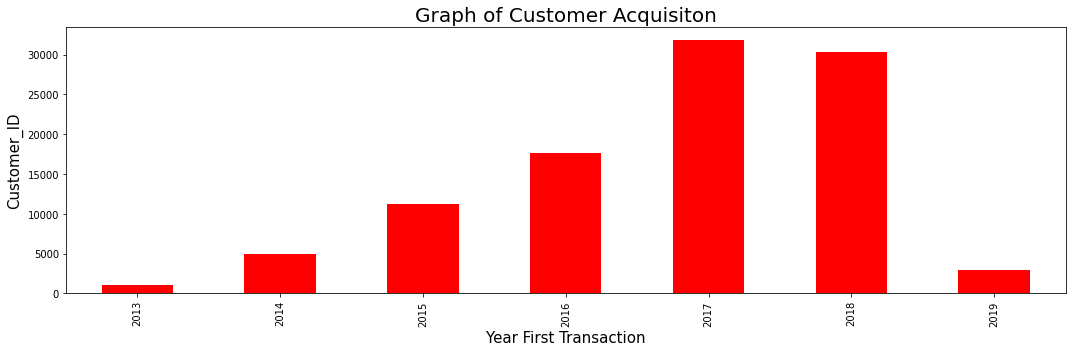

In [112]:
import matplotlib.pyplot as plt
from IPython.display import display

df["Year_First_Transaction"] = df["First_Transaction"].dt.year
df["Year_Last_Transaction"] = df["Last_Transaction"].dt.year

display(df.info())
display(df.head())

df_year = df.groupby(["Year_First_Transaction"])["Customer_ID"].count()
display(df_year.head())

plt.figure(figsize=(15, 5))
df_year.plot(x="Year_First_Transaction", y="Customer_ID", kind="bar", color="red")
plt.title("Graph of Customer Acquisiton", fontsize=20)
plt.xlabel("Year First Transaction", fontsize=15)
plt.ylabel("Customer_ID", fontsize=15)
plt.tight_layout()
plt.show()

## Customer Transaction by Year

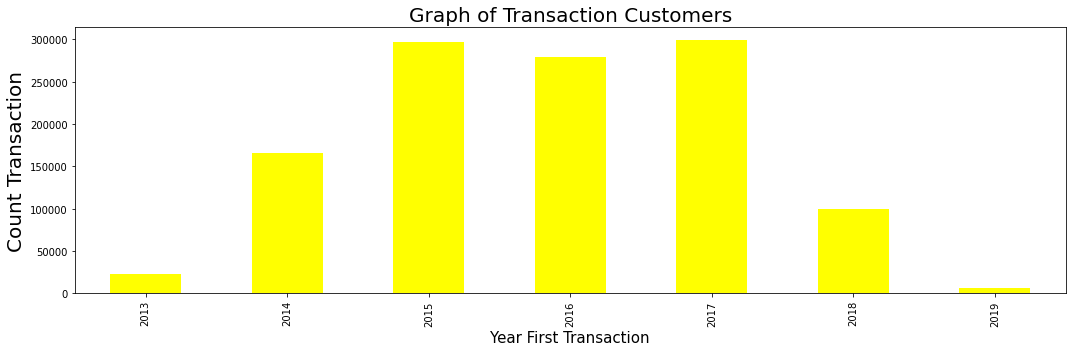

Year_First_Transaction
2013     23154
2014    165494
2015    297445
2016    278707
2017    299199
2018     99989
2019      5862
Name: Count_Transaction, dtype: int64

In [113]:
df_year = df.groupby(["Year_First_Transaction"])["Count_Transaction"].sum()
plt.figure(figsize=(15, 5))
df_year.plot(x="Year_First_Transaction", y="Count_Transaction", kind="bar", color="yellow")
plt.title("Graph of Transaction Customers", fontsize=20)
plt.xlabel("Year First Transaction", fontsize=15)
plt.ylabel("Count Transaction", fontsize=20)
plt.tight_layout()
plt.show()

display(df_year)

## Average transaction amount by year

<Figure size 432x288 with 0 Axes>

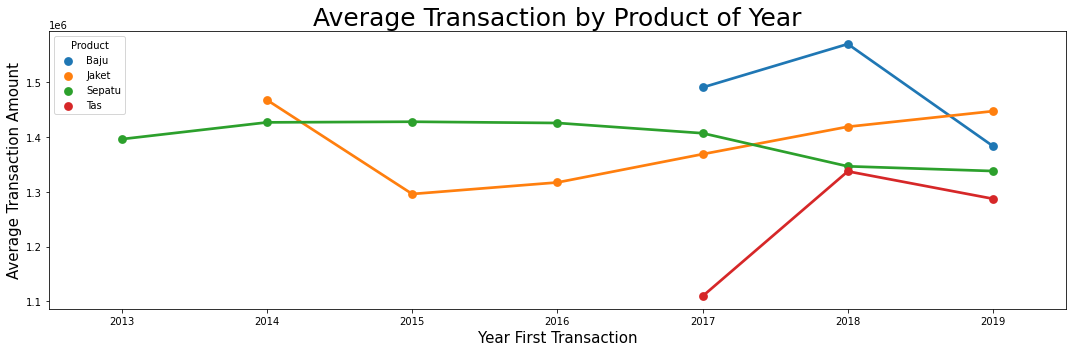

In [114]:
import seaborn as sns

data = df.groupby(["Product", "Year_First_Transaction"]).mean().reset_index()
plt.clf()
plt.figure(figsize=(15, 5))
sns.pointplot(
                data=data,
                x="Year_First_Transaction",
                y="Average_Transaction_Amount",
                hue="Product"
            )
plt.title("Average Transaction by Product of Year", fontsize=25)
plt.xlabel("Year First Transaction", fontsize=15)
plt.ylabel("Average Transaction Amount", fontsize=15)
plt.tight_layout()
plt.show()

## Proporsi Churn untuk setiap Product

Product,Baju,Jaket,Sepatu,Tas
is_churn,,,,
False,1268,11123,16064,4976
True,2144,23827,33090,7508


Index(['Baju', 'Jaket', 'Sepatu', 'Tas'], dtype='object', name='Product')

Product,Baju,Jaket,Sepatu,Tas
is_churn,,,,
False,1268,11123,16064,4976
True,2144,23827,33090,7508


<Figure size 432x288 with 0 Axes>

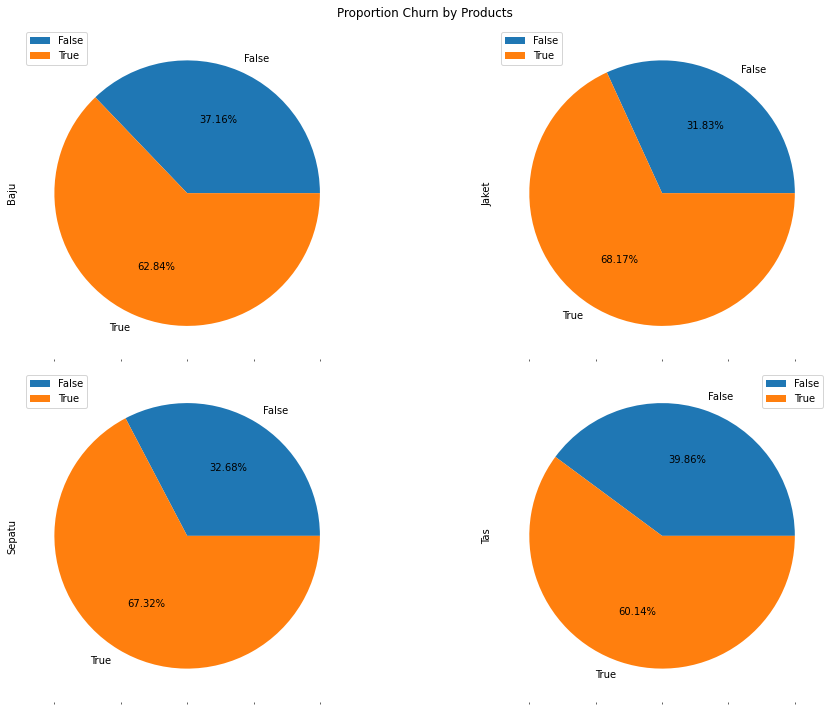

In [115]:
import matplotlib.pyplot as plt

plt.clf()
df_piv = df.pivot_table(
                         index="is_churn",
                         columns="Product",
                         values="Customer_ID",
                         aggfunc="count",
                         fill_value=0
                        )
# display(df.head())
display(df_piv)
plot_produk = df_piv.count().sort_values(ascending=False).head().index
display(plot_produk)
df_piv = df_piv.reindex(columns=plot_produk)
display(df_piv)
df_piv.plot.pie(
                subplots=True,
                figsize=(15, 10),
                layout=(-1, 2),
                autopct="%.2f%%",
                title="Proportion Churn by Products"
               )
plt.tight_layout()
plt.show()

## Distribusi kategorisasi count transaction

,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction,is_churn,Year_First_Transaction,Year_Last_Transaction,Count_Transaction_Group
0,29531,Jaket,2016-06-19 02:44:34.396,2018-10-05 05:48:02.608,1467681,22,False,2016,2018,5. >10
1,29531,Sepatu,2014-07-23 01:02:11.494,2018-12-25 11:02:41.270,1269337,41,False,2014,2018,5. >10
2,141526,Tas,2017-04-28 03:12:27.000,2019-01-24 09:40:02.000,310915,30,False,2017,2019,5. >10
3,141526,Jaket,2017-04-28 06:52:52.547,2019-01-16 13:00:03.911,722632,27,False,2017,2019,5. >10
4,37545,Sepatu,2015-04-16 10:01:38.531,2018-11-22 12:53:41.530,1775036,25,False,2015,2018,5. >10


Count_Transaction_Group
1. 1         49255
2. 2 - 3     14272
3. 4 - 6      5557
4. 7 - 10     2890
5. >10       28026
Name: Customer_ID, dtype: int64

<Figure size 432x288 with 0 Axes>

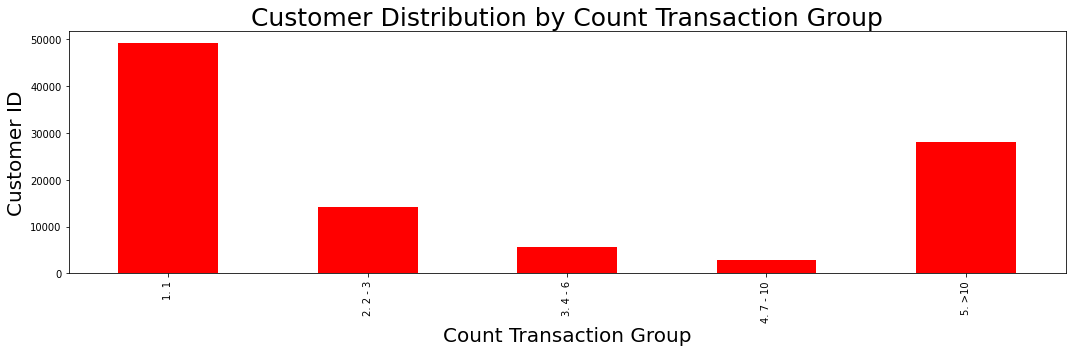

In [116]:
import matplotlib.pyplot as plt

plt.clf()
def func(row):
    if row["Count_Transaction"] == 1:
        val = "1. 1"
    elif (row["Count_Transaction"] > 1 and row["Count_Transaction"] <= 3):
        val = "2. 2 - 3"
    elif (row["Count_Transaction"] > 4 and row["Count_Transaction"] <= 6):
        val = "3. 4 - 6"
    elif (row["Count_Transaction"] > 6 and row["Count_Transaction"] <= 10):
        val = "4. 7 - 10"
    else:
        val = "5. >10"
    
    return val

df["Count_Transaction_Group"] = df.apply(func, axis=1)
display(df.head())
df_year = df.groupby(["Count_Transaction_Group"])["Customer_ID"].count()
display(df_year)

plt.figure(figsize=(15, 5))
df_year.plot(x="Count_Transaction_Group", y="Customer_ID", kind="bar", color="red")
plt.title("Customer Distribution by Count Transaction Group", fontsize=25)
plt.xlabel("Count Transaction Group", fontsize=20)
plt.ylabel("Customer ID", fontsize=20)
plt.tight_layout()
plt.show()

## Distribusi kategorisasi average transaction amount

<Figure size 432x288 with 0 Axes>

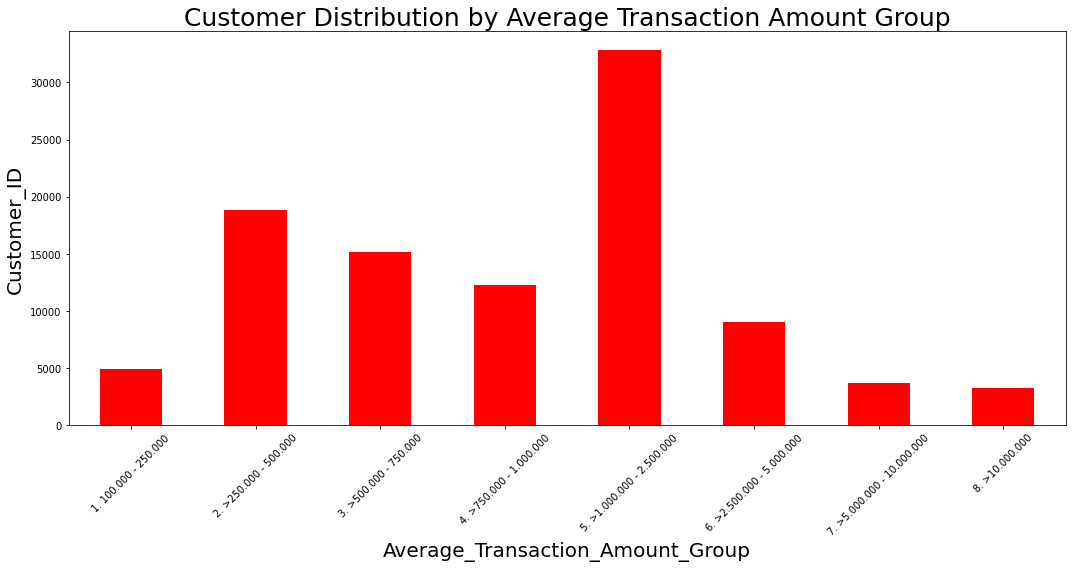

In [117]:
import matplotlib.pyplot as plt

plt.clf()
# Kategorisasi rata-rata besar transaksi
def f(row):
    if (row['Average_Transaction_Amount'] >= 100000 and row['Average_Transaction_Amount'] <= 200000):
        val ='1. 100.000 - 250.000'
    elif (row['Average_Transaction_Amount'] > 250000 and row['Average_Transaction_Amount'] <= 500000):
        val ='2. >250.000 - 500.000'
    elif (row['Average_Transaction_Amount'] > 500000 and row['Average_Transaction_Amount'] <= 750000):
        val ='3. >500.000 - 750.000'
    elif (row['Average_Transaction_Amount'] > 750000 and row['Average_Transaction_Amount'] <= 1000000):
        val ='4. >750.000 - 1.000.000'
    elif (row['Average_Transaction_Amount'] > 1000000 and row['Average_Transaction_Amount'] <= 2500000):
        val ='5. >1.000.000 - 2.500.000'
    elif (row['Average_Transaction_Amount'] > 2500000 and row['Average_Transaction_Amount'] <= 5000000):
        val ='6. >2.500.000 - 5.000.000'
    elif (row['Average_Transaction_Amount'] > 5000000 and row['Average_Transaction_Amount'] <= 10000000):
        val ='7. >5.000.000 - 10.000.000'
    else:
        val ='8. >10.000.000'
    return val

df["Average_Transaction_Amount_Group"] = df.apply(f, axis=1)
df_year = df.groupby(["Average_Transaction_Amount_Group"])["Customer_ID"].count()
plt.figure(figsize=(15, 8))
df_year.plot(x="Average_Transaction_Amount_Group", y="Customer_ID", kind="bar", color="red")
plt.title("Customer Distribution by Average Transaction Amount Group", fontsize=25)
plt.xlabel("Average_Transaction_Amount_Group", fontsize=20)
plt.ylabel("Customer_ID", fontsize=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# display(df.head())
# display(df_year)

## Feature Column & Target

In [124]:
df["Year_Diff"] = df["Year_Last_Transaction"] - df["Year_First_Transaction"]

feature_columns = ["Average_Transaction_Amount", "Count_Transaction", "Year_Diff"]

X = df[feature_columns]
y = df["is_churn"].astype("int64")
display(y)

0        0
1        0
2        0
3        0
4        0
        ..
99995    1
99996    1
99997    1
99998    1
99999    0
Name: is_churn, Length: 100000, dtype: int64

## Split X dan y ke dalam bagian training dan testing

In [125]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## Train, predict dan evaluate

In [131]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
display(cnf_matrix)

array([[    1,  8330],
       [    3, 16666]], dtype=int64)

tn = 1.000000
 fp = 8330.000000
 fn = 3.000000
 tp = 16666.000000



## Visualisasi Confusion Matrix

tn = 1.000000
 fp = 8330.000000
 fn = 3.000000
 tp = 16666.000000



<Figure size 1440x576 with 0 Axes>

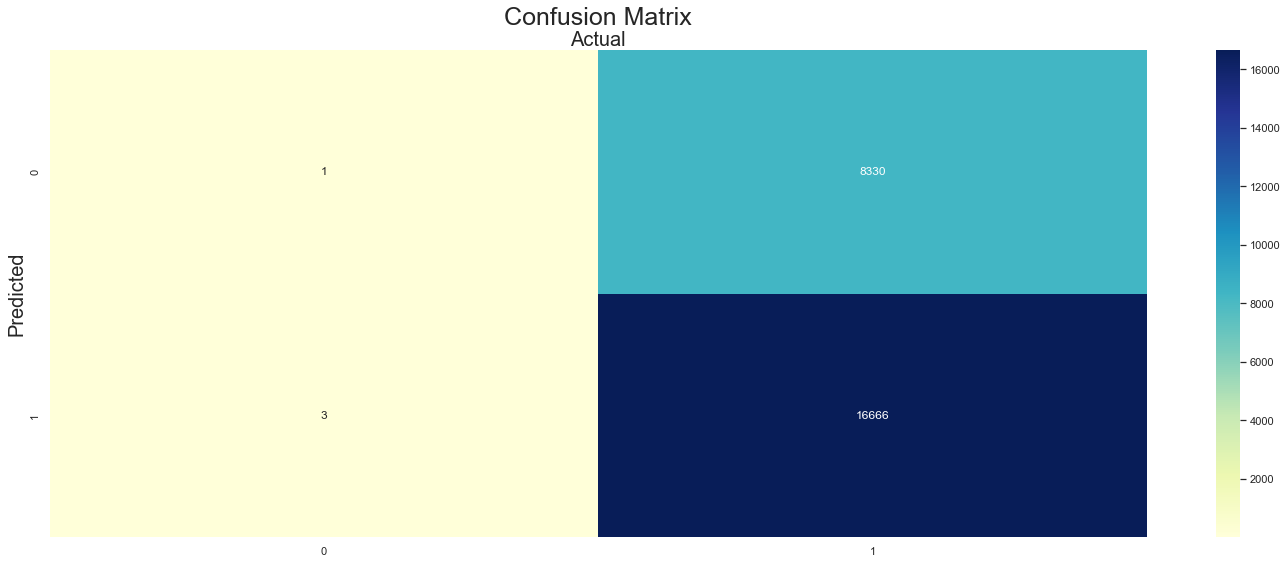

In [149]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.clf()
class_names = [0, 1]
fig, ax = plt.subplots()

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("tn = %f\n fp = %f\n fn = %f\n tp = %f\n"%(tn, fp, fn, tp))

df_cnf_matrix = pd.DataFrame(cnf_matrix)
# fig, ax = plt.subplots(figsize=(10, 5))
sns.set(rc = {'figure.figsize':(20,8)})
sns.heatmap(df_cnf_matrix, annot=True, cmap="YlGnBu", fmt="g")
ax.xaxis.set_label_position("top")
plt.title("Confusion Matrix", fontsize=25)
plt.xlabel("Actual", fontsize=20)
plt.ylabel("Predicted", fontsize=20)
plt.tight_layout()
plt.show()

## Accuracy, Precision, dan Recall

In [150]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

#Menghitung Accuracy, Precision, dan Recall
print('Accuracy :', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='micro'))
print('Recall :', recall_score(y_test, y_pred, average='micro'))

Accuracy : 0.66668
Precision: 0.66668
Recall : 0.66668
